<a href="https://colab.research.google.com/github/Tahaarthuna112/Learning-with-data-masters/blob/main/Implementation_of_ANN_in_Keras_Assignment_Qs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [ ]:
%pip install tensorflow keras

In [ ]:
import tensorflow
tensorflow.__version__

'2.17.0'

In [ ]:
import keras
keras.__version__

'3.4.1'

In [ ]:
Q2. Load the Wine Quality dataset and explore its dimensions.

In [ ]:
#read the dataset
import pandas as pd
df = pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [ ]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
quality,1599,2,good,855


<Axes: title={'center': 'Wine Quality CountPlot'}, xlabel='quality'>

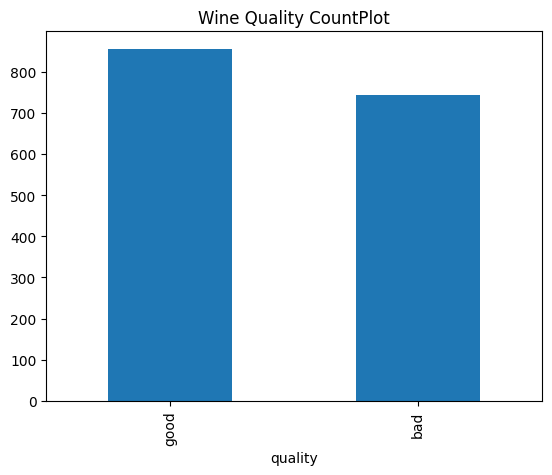

In [ ]:
df['quality'].value_counts().plot(kind='bar',title='Wine Quality CountPlot')

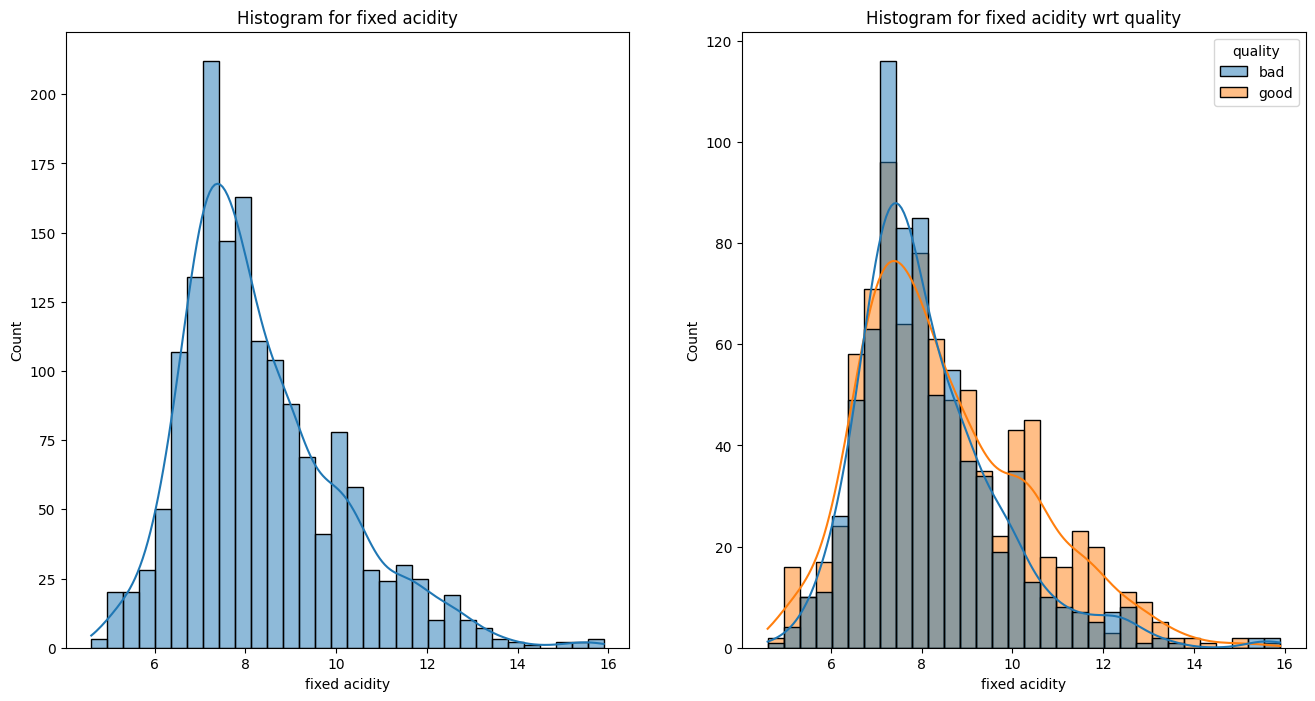

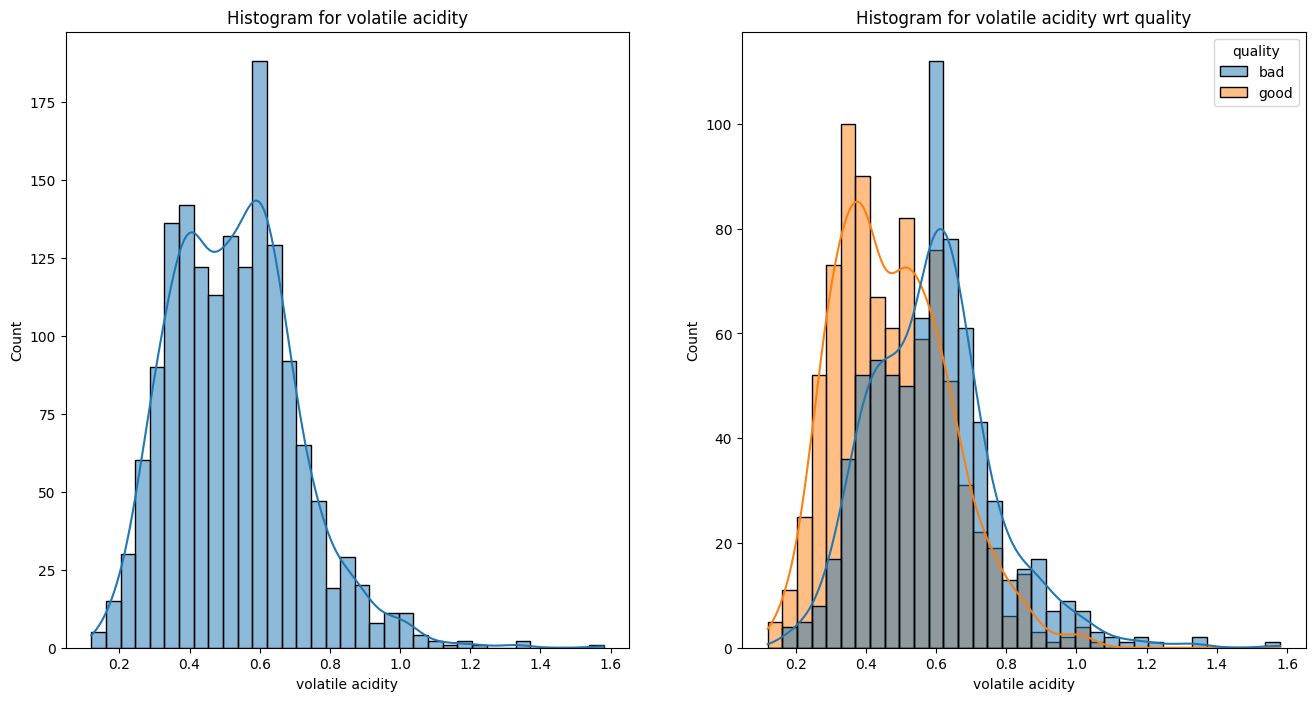

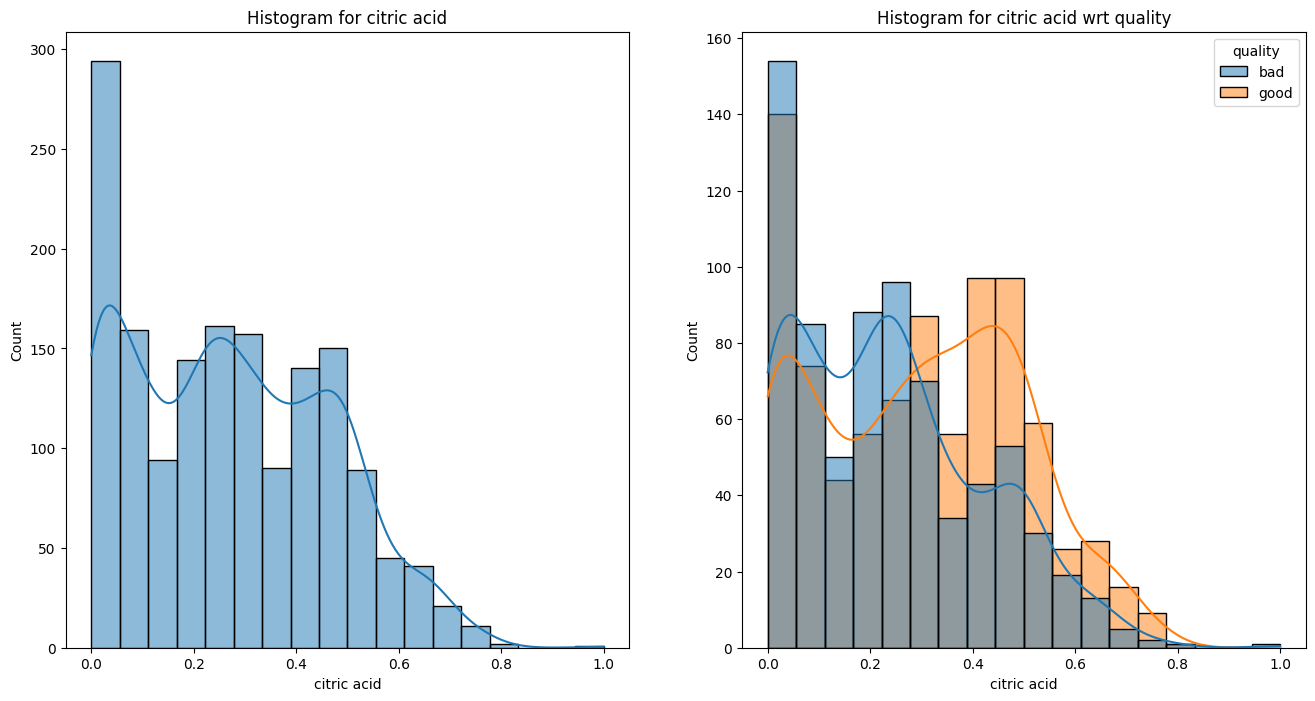

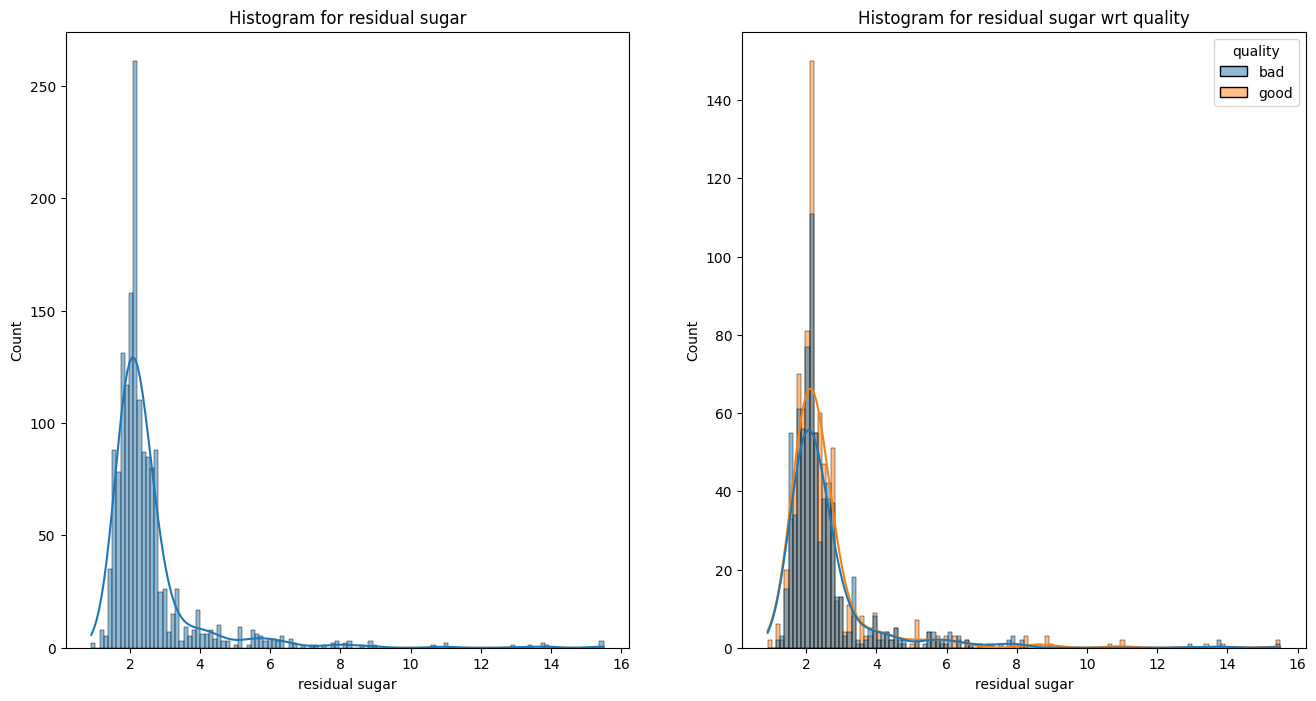

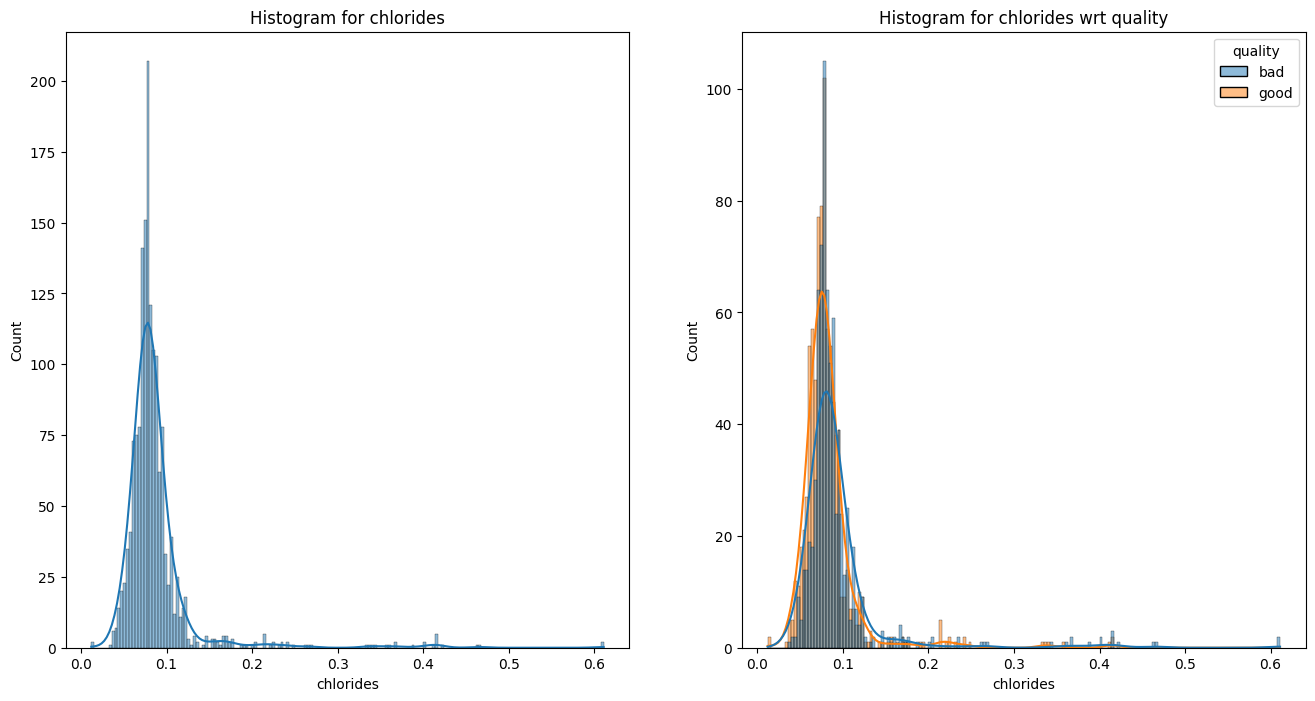

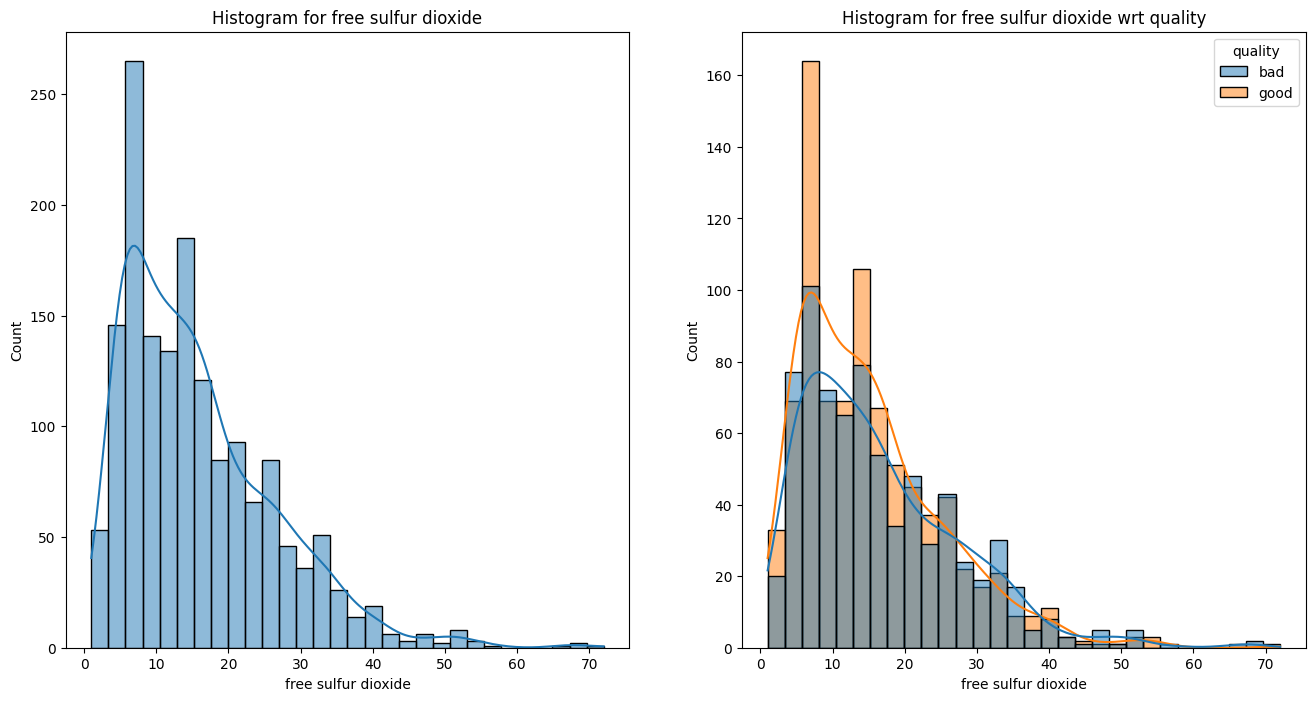

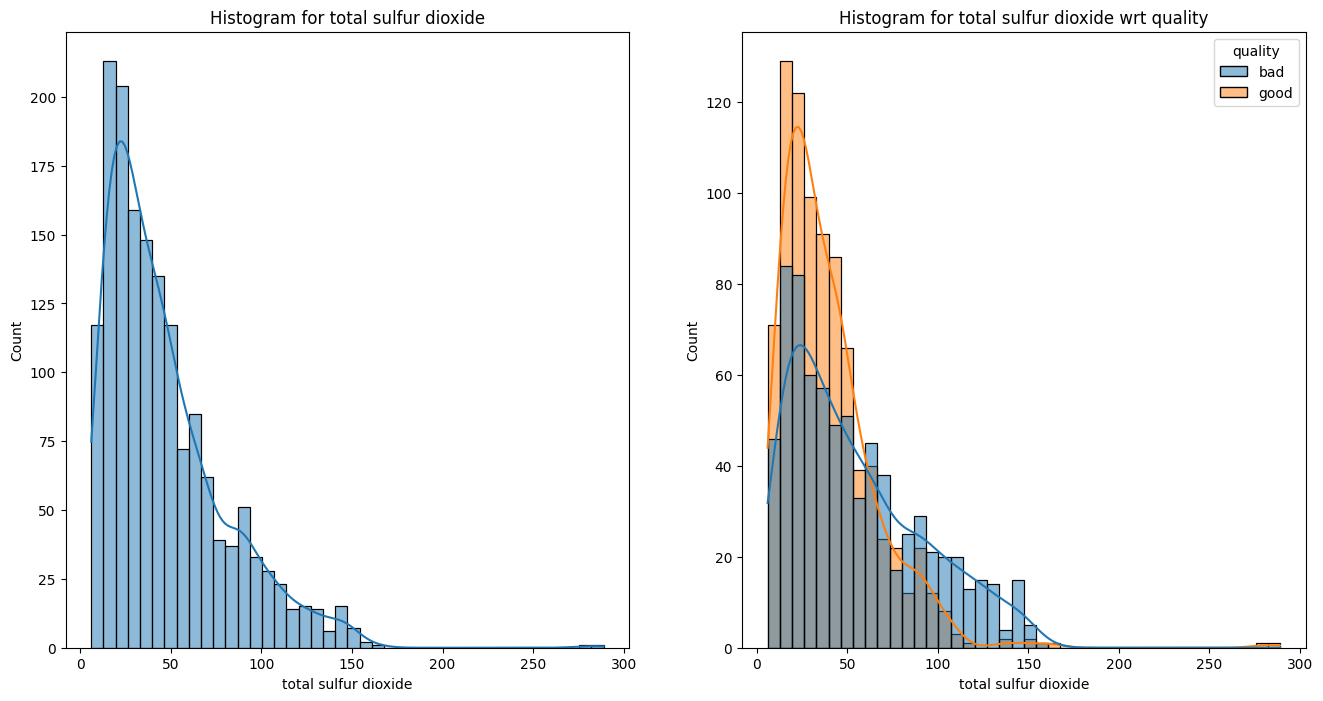

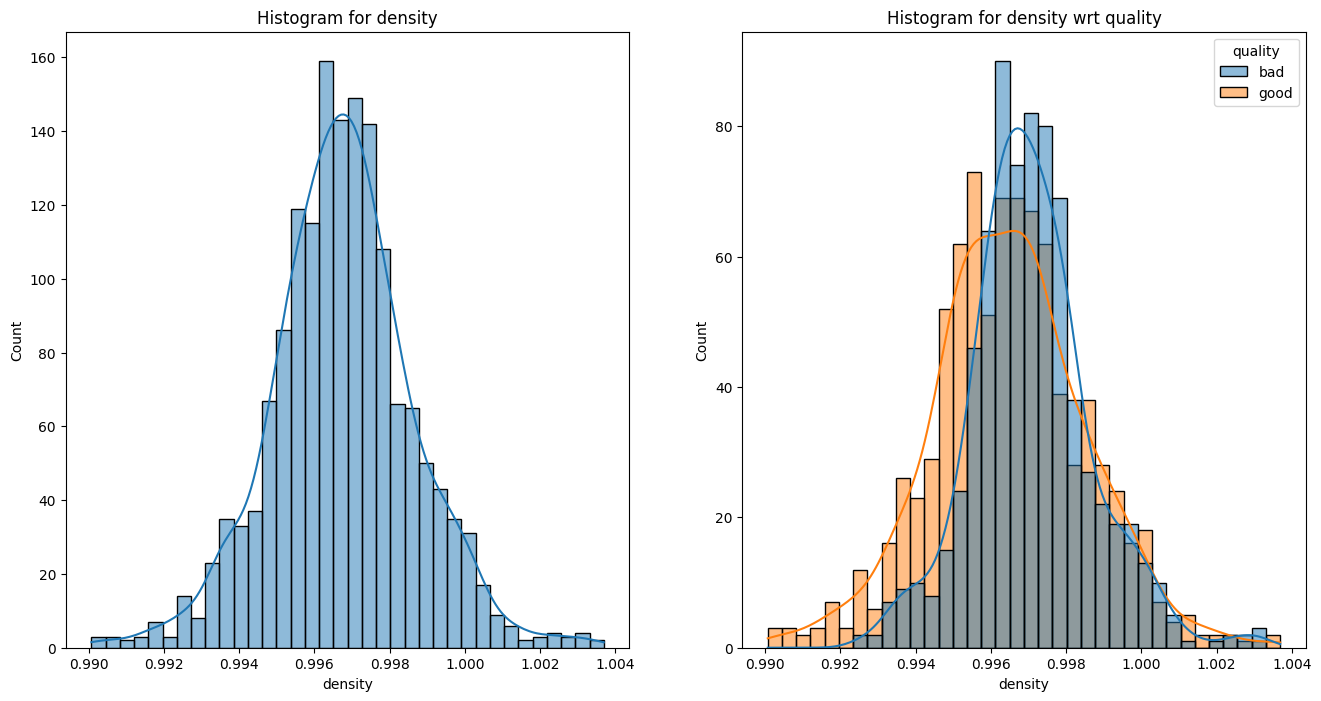

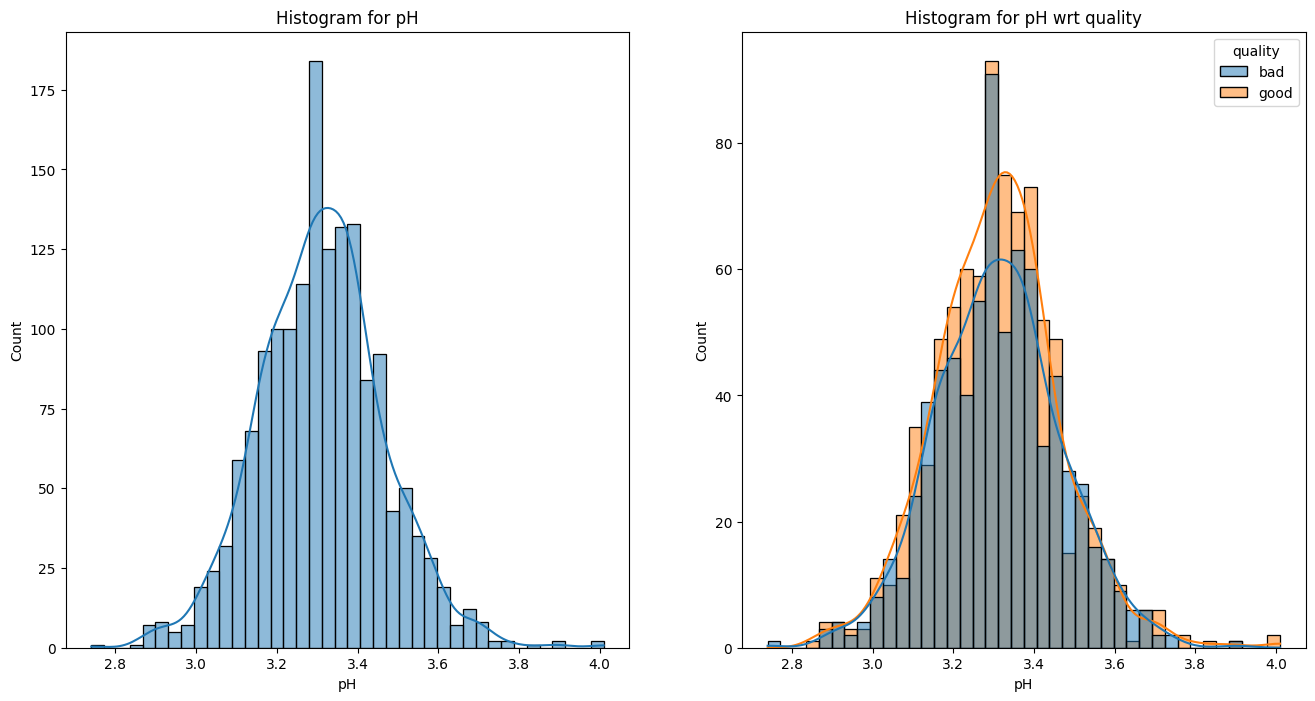

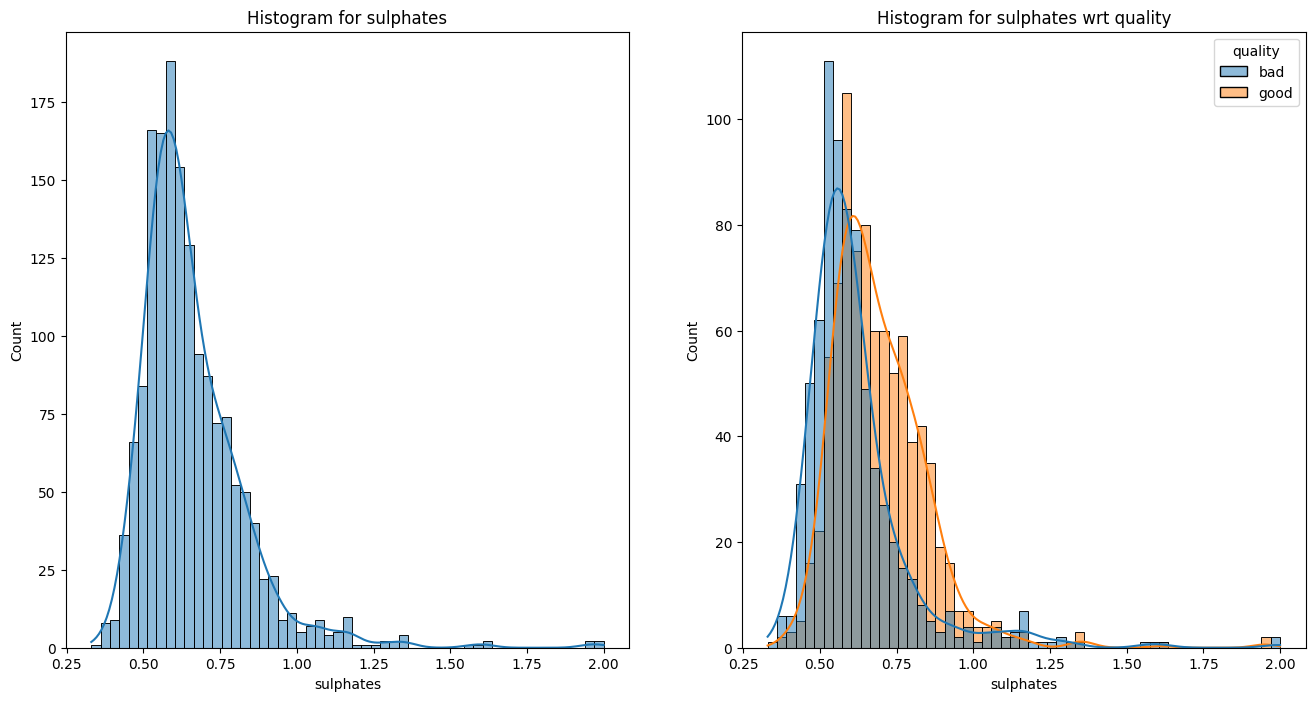

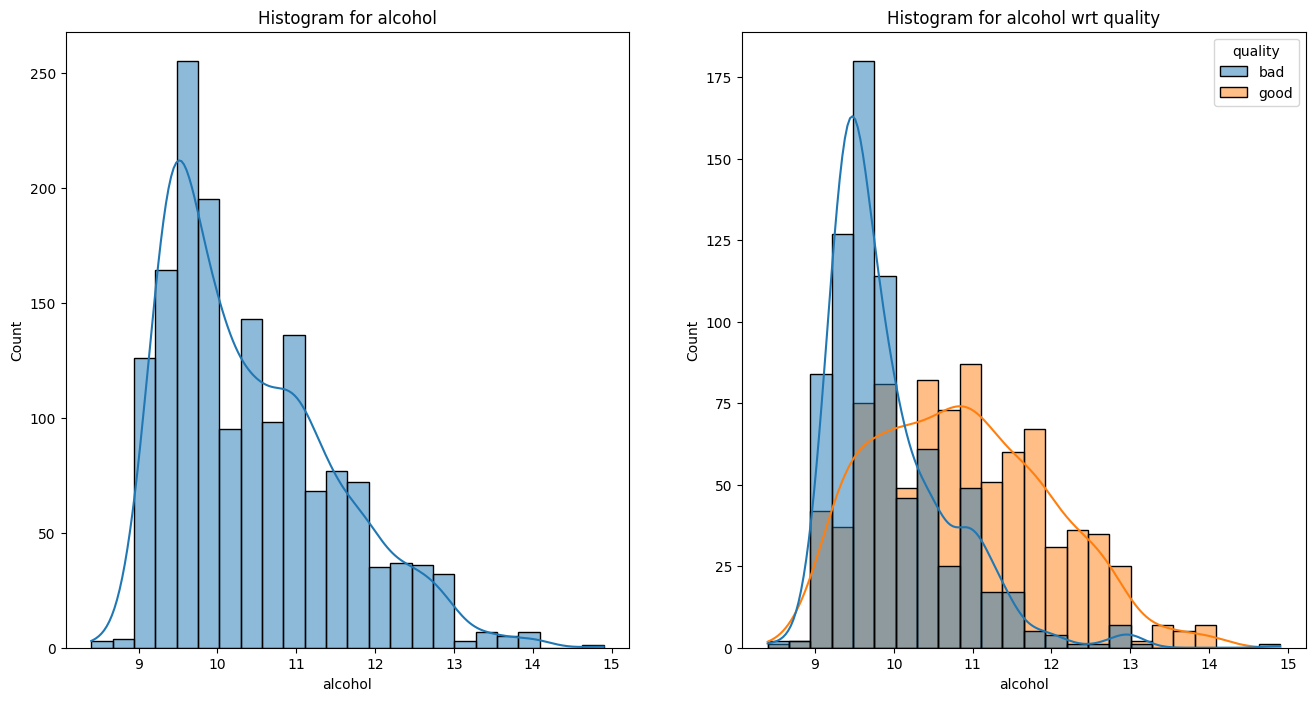

In [ ]:
# Histogram for continous features
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
    if df[i].dtype!='object':
        plt.figure(figsize=(16,8))
        plt.subplot(1,2,1)
        sns.histplot(data=df,x=i,kde=True)
        plt.title(f'Histogram for {i}')

        plt.subplot(1,2,2)
        sns.histplot(data=df,x=i,hue='quality',kde=True)
        plt.title(f'Histogram for {i} wrt quality')

        plt.show()

In [ ]:
df.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


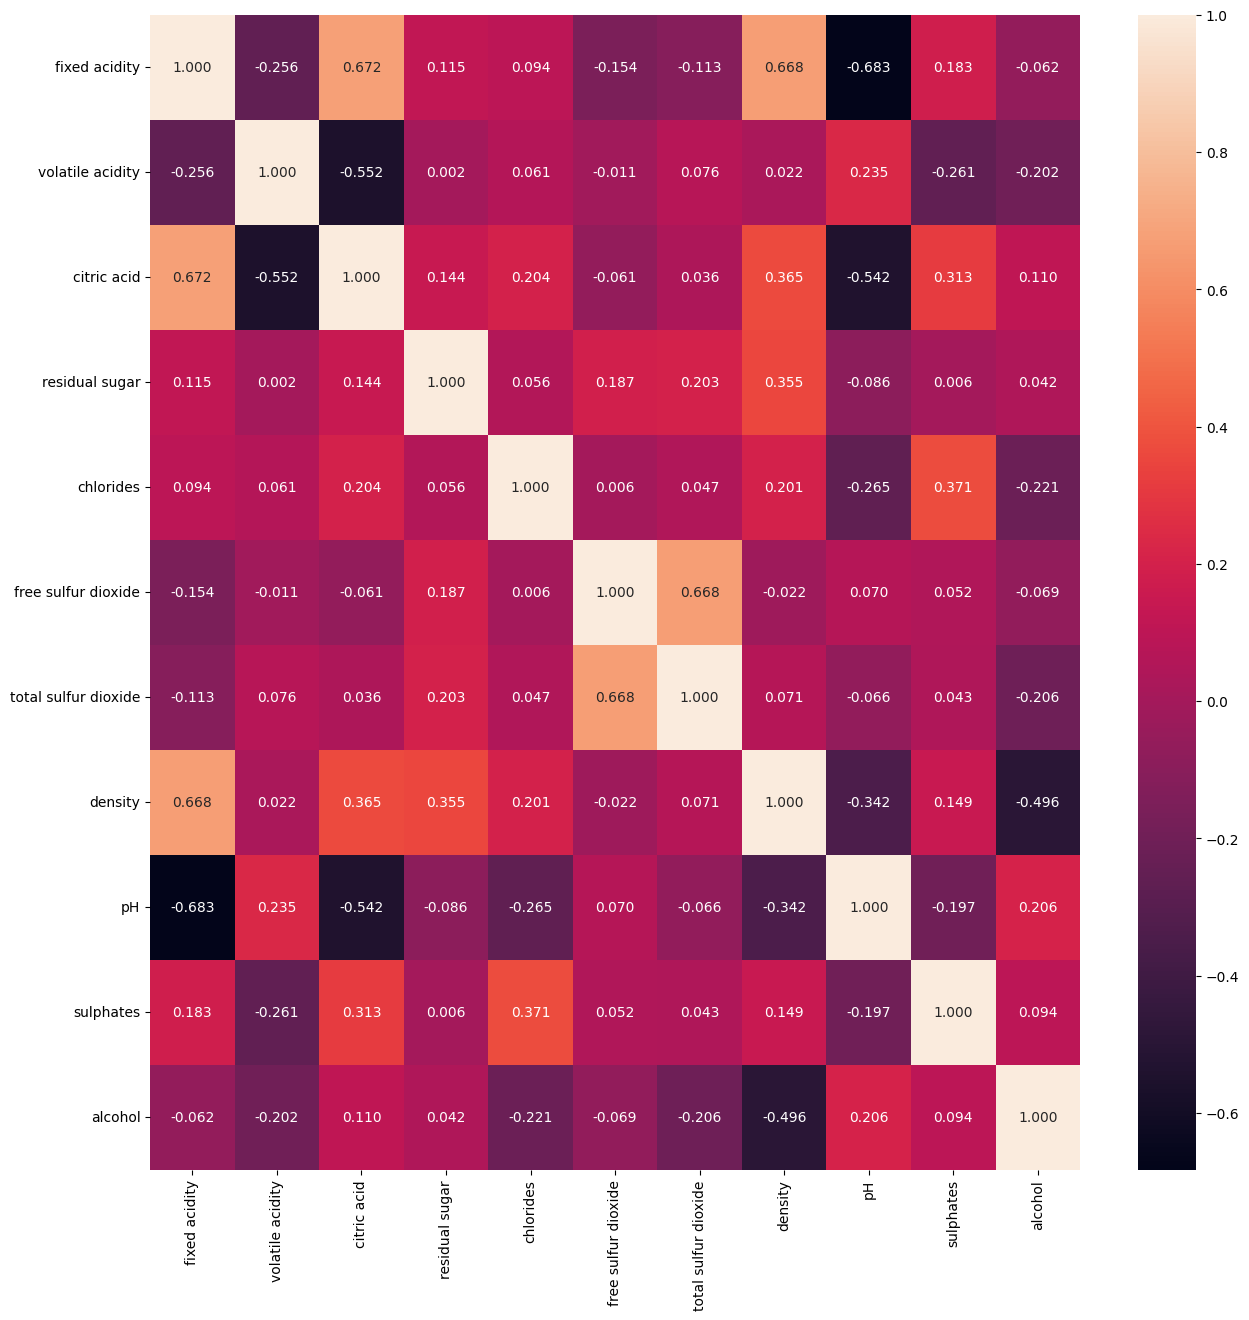

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.3f')
plt.show()

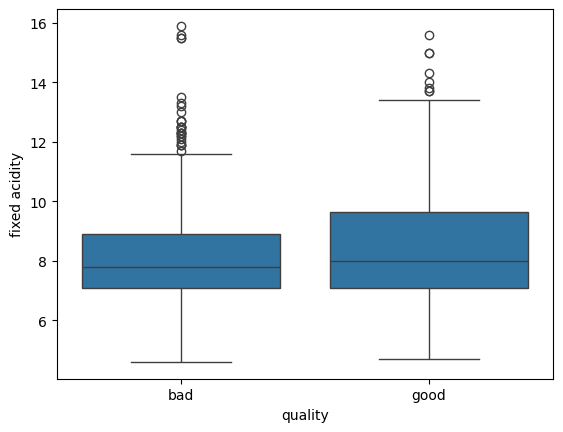

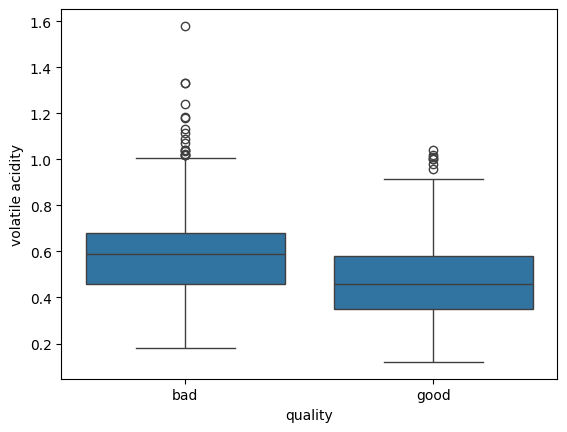

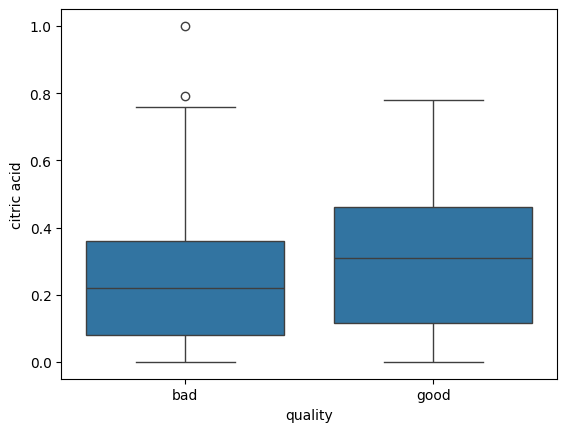

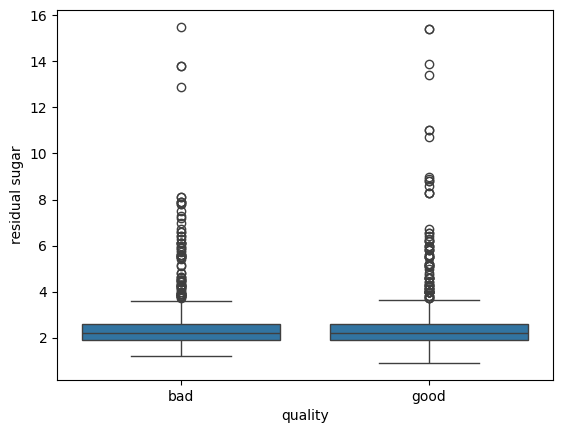

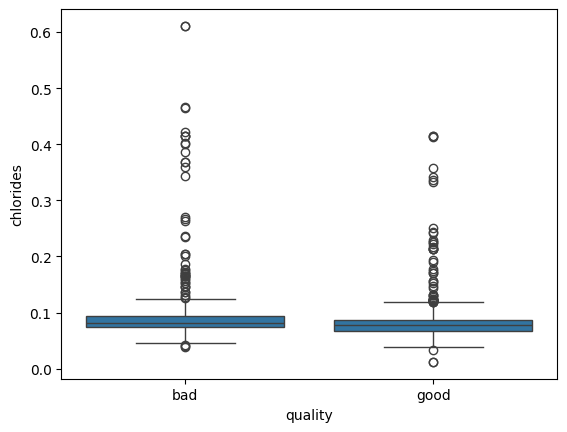

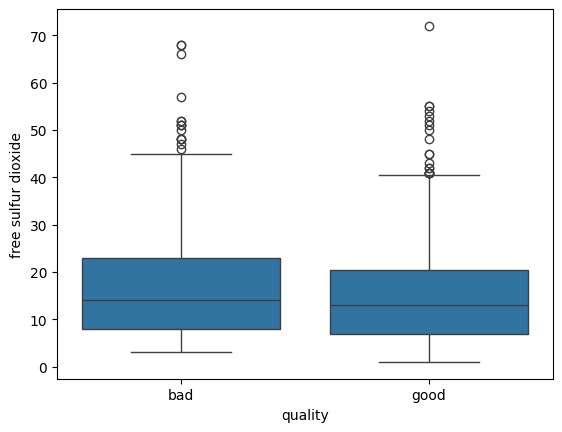

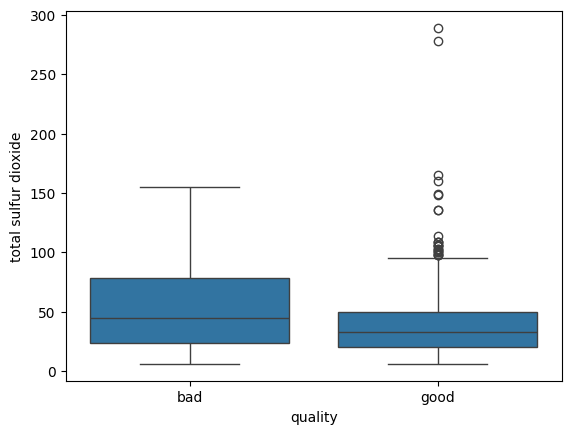

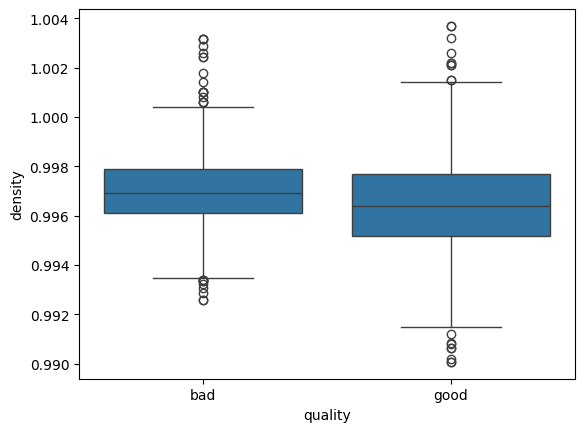

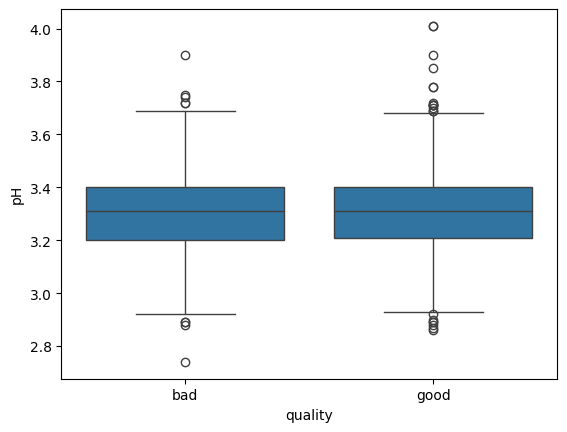

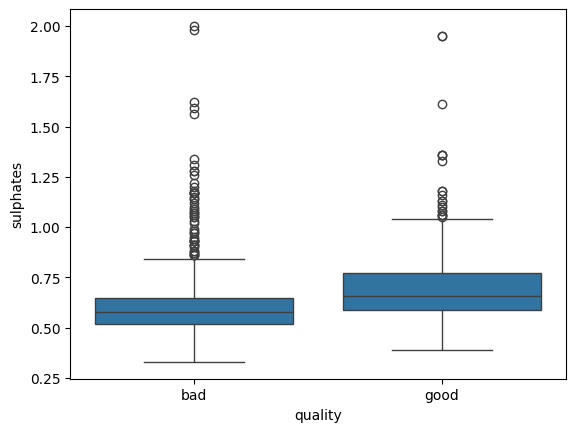

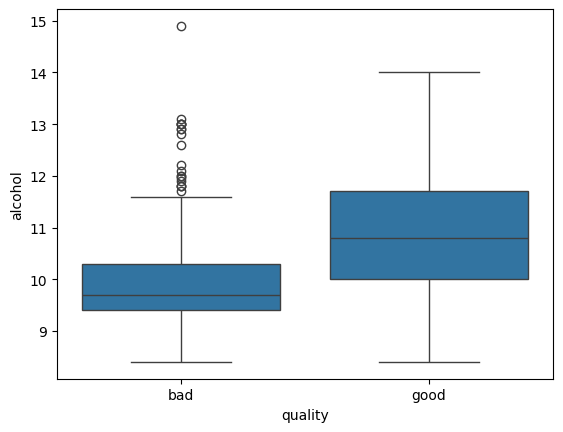

In [ ]:
# Box Plot wrt Wine Quality
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(data=df,x='quality',y=i)
        plt.show()

In [ ]:
Q3. Check for null values, identify categorical variables, and encode them.

In [ ]:
# Checking missing values
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Categorical Features
df.columns[df.dtypes=='object']

Index([], dtype='object')

In [ ]:
# Label Encoding the quality column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])

<ipython-input-57-9e22ff962564>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'] = le.fit_transform(df['quality'])


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [ ]:
# Checking duplicated values
df.duplicated().sum()

0

In [ ]:
df.shape

(1359, 12)

In [ ]:
Q4. Separate the features and target variables from the dataset.

In [ ]:
X = df.drop(labels=['quality'],axis=1)
Y = df[['quality']]

In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [ ]:
Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
xtrain.shape

(1087, 11)

In [ ]:
xtest.shape

(272, 11)

In [ ]:
Q6. Scale the dataset using an appropriate scaling technique.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scl = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest_scl = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [ ]:
xtest_scl.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.343944,0.517338,-1.194658,0.933678,-0.106593,0.896271,-0.055555,0.591961,0.200156,-0.746237,-0.857565
1,-0.054125,0.601441,-0.887420,-0.311698,-0.316290,0.896271,0.395101,-0.170479,-0.128400,0.519851,0.425831
2,0.061803,-0.884392,0.802390,-0.165183,-0.506923,-0.362070,-0.836691,-0.642977,-0.916933,0.865147,0.700844
3,0.931263,-0.211562,1.570486,0.713906,0.084040,-0.652457,-0.115642,1.987978,-0.128400,-0.458489,-1.315921
4,-1.155440,2.760106,-1.399484,-0.384955,-0.125657,0.121907,-0.686473,-1.249707,1.842934,-0.631138,0.700844


In [ ]:
xtest_scl.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.343944,0.517338,-1.194658,0.933678,-0.106593,0.896271,-0.055555,0.591961,0.200156,-0.746237,-0.857565
1,-0.054125,0.601441,-0.887420,-0.311698,-0.316290,0.896271,0.395101,-0.170479,-0.128400,0.519851,0.425831
2,0.061803,-0.884392,0.802390,-0.165183,-0.506923,-0.362070,-0.836691,-0.642977,-0.916933,0.865147,0.700844
3,0.931263,-0.211562,1.570486,0.713906,0.084040,-0.652457,-0.115642,1.987978,-0.128400,-0.458489,-1.315921
4,-1.155440,2.760106,-1.399484,-0.384955,-0.125657,0.121907,-0.686473,-1.249707,1.842934,-0.631138,0.700844


In [ ]:
Q7. Design and implement at least two hidden layers and an output layer for the binary categorical
variables.

In [ ]:
from keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
layer1 = Dense(128,input_dim=xtrain.shape[1],activation='relu')
layer2 = BatchNormalization()
layer3 = Dropout(0.2)

layer4 = Dense(64,activation='relu')
layer5 = BatchNormalization()
layer6 = Dropout(0.2)

output = Dense(1,activation='sigmoid')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [ ]:
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)
model.add(layer5)
model.add(layer6)
model.add(output)

In [ ]:
Q9. Print the summary of the model architecture.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,241 (40.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [ ]:
from keras.optimizers import Adam
loss = 'binary_crossentropy'
optimizer = Adam(learning_rate=0.0001)
metrics = ['accuracy']

In [ ]:
Q11. Compile the model with the specified loss function, optimizer, and metrics

In [ ]:
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [ ]:
hist = model.fit(xtrain_scl, ytrain, epochs=100, validation_split=0.2, batch_size=64)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.4497 - loss: 0.9384 - val_accuracy: 0.5092 - val_loss: 0.6955
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5530 - loss: 0.7884 - val_accuracy: 0.5917 - val_loss: 0.6831
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5940 - loss: 0.7440 - val_accuracy: 0.6330 - val_loss: 0.6703
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6067 - loss: 0.7328 - val_accuracy: 0.6881 - val_loss: 0.6589
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6420 - loss: 0.6712 - val_accuracy: 0.6927 - val_loss: 0.6477
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6656 - loss: 0.6483 - val_accuracy: 0.6881 - val_loss: 0.6375
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6479 - loss: 0.6513 - val_accuracy: 0.7018 - val_loss: 0.6273
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6879 - loss: 0.6261 - val_accuracy: 0.7110 - 

In [ ]:
Q13. Obtain the model's parameters (weights and biases).

In [ ]:
model.get_weights()

[array([[-0.06409213,  0.11509733,  0.16152549, ..., -0.20954986,
          0.12792802,  0.0286576 ],
        [-0.14335965,  0.08402951,  0.04767863, ...,  0.17179793,
          0.1346311 ,  0.09239184],
        [-0.06831788, -0.02648523, -0.08092695, ...,  0.0525904 ,
          0.12833776, -0.13909018],
        ...,
        [ 0.17426342,  0.01683932,  0.08893745, ...,  0.01135884,
         -0.09599338,  0.09225553],
        [-0.00095688, -0.10651071, -0.04789134, ...,  0.05277979,
         -0.04340681, -0.09251672],
        [ 0.13964881,  0.06799519, -0.17391507, ...,  0.14380358,
          0.00961951, -0.18664803]], dtype=float32),
 array([-1.17899326e-03,  9.16880742e-03,  4.07627551e-03,  2.47112778e-03,
         1.61099143e-03,  2.67385114e-02,  5.76300500e-03,  2.63580848e-02,
         5.74648206e-04,  1.08961510e-02,  1.04823112e-02, -5.41407242e-03,
         1.34204542e-02,  1.45440297e-02, -2.50214078e-02,  4.81424388e-03,
         8.32421865e-05, -7.34014949e-03, -6.11122698e

In [ ]:
Q14. Store the model's training history as a Pandas DataFrame.

In [ ]:
df_history = pd.DataFrame(hist.history)
df_history

,accuracy,loss,val_accuracy,val_loss
0,0.466053,0.910612,0.509174,0.695455
1,0.527043,0.813462,0.591743,0.683061
2,0.590334,0.745110,0.633027,0.670318
3,0.598389,0.726772,0.688073,0.658923
4,0.640967,0.666470,0.692661,0.647735
...,...,...,...,...
95,0.754891,0.481983,0.743119,0.562948
96,0.751438,0.490749,0.747706,0.563109
97,0.788262,0.477367,0.747706,0.563494
98,0.767549,0.474432,0.747706,0.563366


In [ ]:
Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

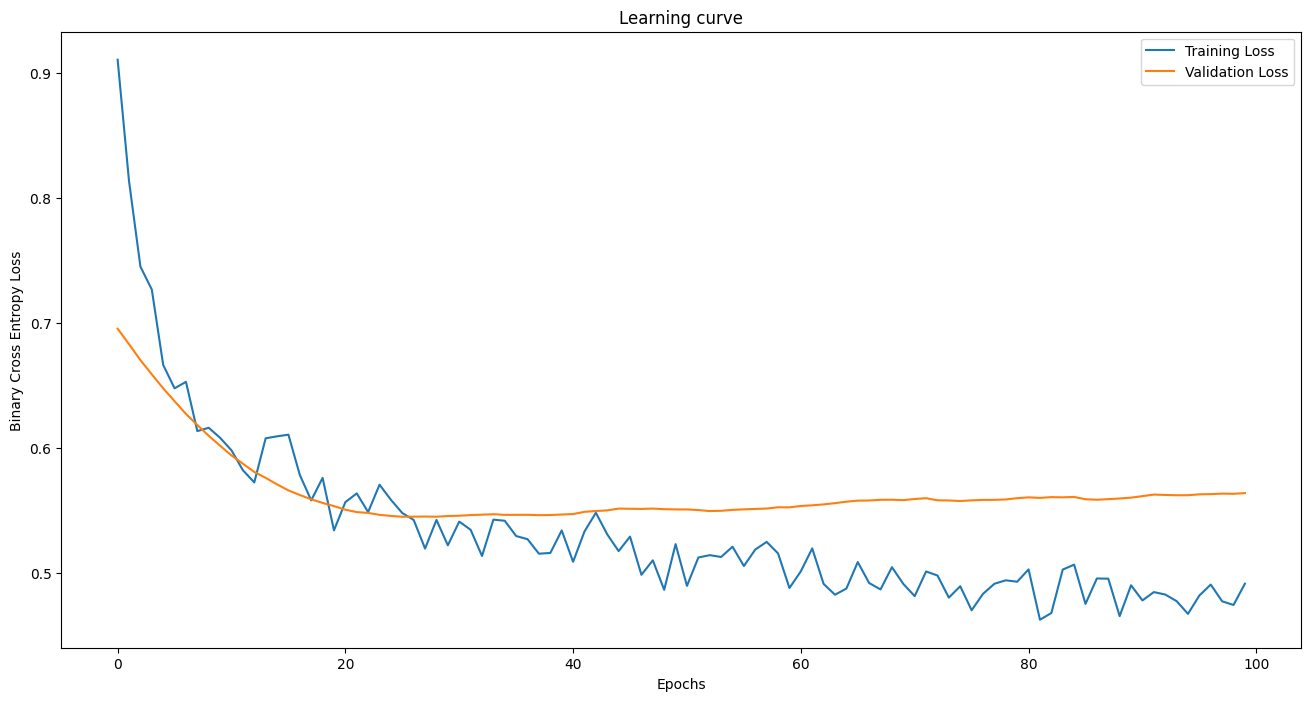

In [ ]:
# Learning curve plot
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Learning curve')
plt.legend()
plt.show()

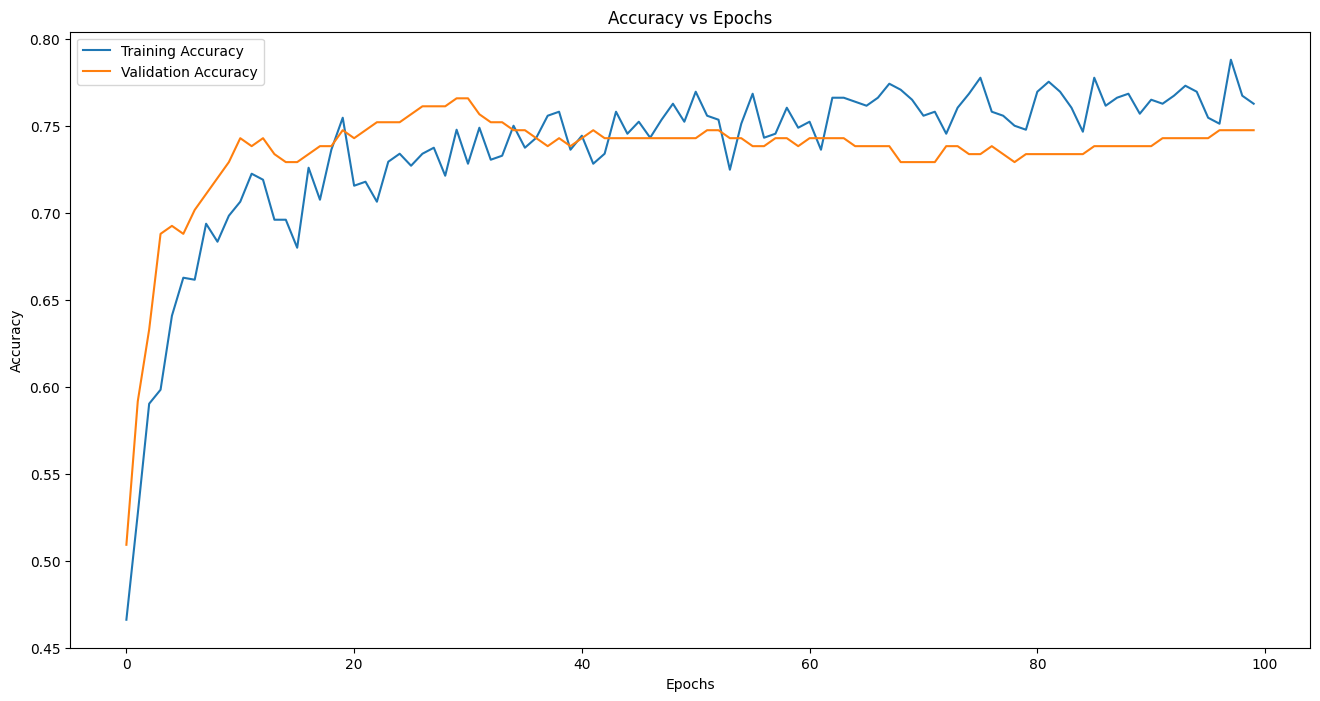

In [ ]:
# accuracy plot
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['accuracy'],label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

In [ ]:
Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [ ]:
# Evaluation in testing
model.evaluate(xtest_scl,ytest)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7636 - loss: 0.5047  


[0.5037124156951904, 0.7536764740943909]

In [ ]:
# Predicting the data
yprob_tr = model.predict(xtrain_scl)
yprob_ts = model.predict(xtest_scl)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
# Predictions for testing
ypred_ts = []
for i in yprob_ts:
    if i>=0.5:
        ypred_ts.append(1)
    else:
        ypred_ts.append(0)

In [ ]:
ypred_ts[0:5]

[0, 1, 1, 0, 1]

In [ ]:
ytest.head()

,quality
55,0
1291,1
1544,1
593,0
1261,0


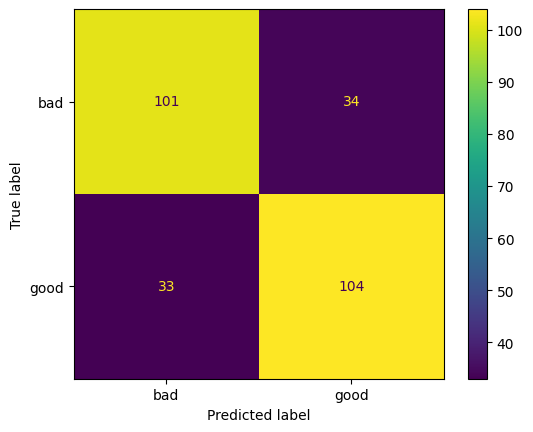

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=['bad','good'])
cfd.plot()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       135
           1       0.75      0.76      0.76       137

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.75      0.75      0.75       272

